In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import DistanceMetric
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Dane bez SMOTE

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Praca inżynierska/Parkinsson disease.csv'
df = pd.read_csv(file_path)
X = df.drop(['name','status'], axis=1)
y = df['status']

In [ ]:
df['status'].value_counts()

,count
status,
1,147
0,48


SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X,y)
print("Rozmiar przed nadprobkowaniem",X.shape)
print("Rozmiar po nadpróbkowaniu",X_resampled.shape)

Rozmiar przed nadprobkowaniem (195, 22)
Rozmiar po nadpróbkowaniu (294, 22)


In [ ]:
X.shape

(195, 22)

In [ ]:
X_resampled.shape

(294, 22)

In [ ]:
y.shape

(195,)

In [ ]:
y_resampled.shape

(294,)

In [ ]:
df1=pd.concat([X_resampled,y_resampled],axis=1) # sklejanie nowych danych
df1.shape

(294, 23)

In [ ]:
df1['status'].value_counts()

,count
status,
1,147
0,147


Skalowanie

In [ ]:
sc_resampled = StandardScaler()
sc_resampled.fit(X_resampled)
X_resampled = sc_resampled.transform(X_resampled)

In [ ]:
X_resampled

array([[-0.95831841, -0.56302201, -1.0212626 , ...,  0.76167121,
        -0.01866618,  1.21816288],
       [-0.90758777, -0.66853859, -0.28923512, ...,  1.62307063,
         0.48899302,  2.18196808],
       [-1.02805196, -0.88243774, -0.3319251 , ...,  1.31872396,
         0.09309041,  1.76854818],
       ...,
       [ 0.54192413,  2.56598823, -0.98955961, ..., -0.07792909,
        -0.4611198 , -0.61630685],
       [-0.96152807, -0.05520046, -0.47289494, ...,  0.20577611,
        -0.44656381,  0.55991264],
       [ 0.26383784,  0.40604931, -0.98955097, ..., -0.57388703,
         1.09760471, -0.41781197]])

Podział na zbiory

In [ ]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Drzewa decyzyjne

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
#clf = tree.DecisionTreeClassifier(max_depth=3)

In [ ]:
clf.fit(X_train_resampled, y_train_resampled)
y_pred_clf_train_resampled = clf.predict(X_train_resampled)
y_pred_clf_test_resampled = clf.predict(X_test_resampled)

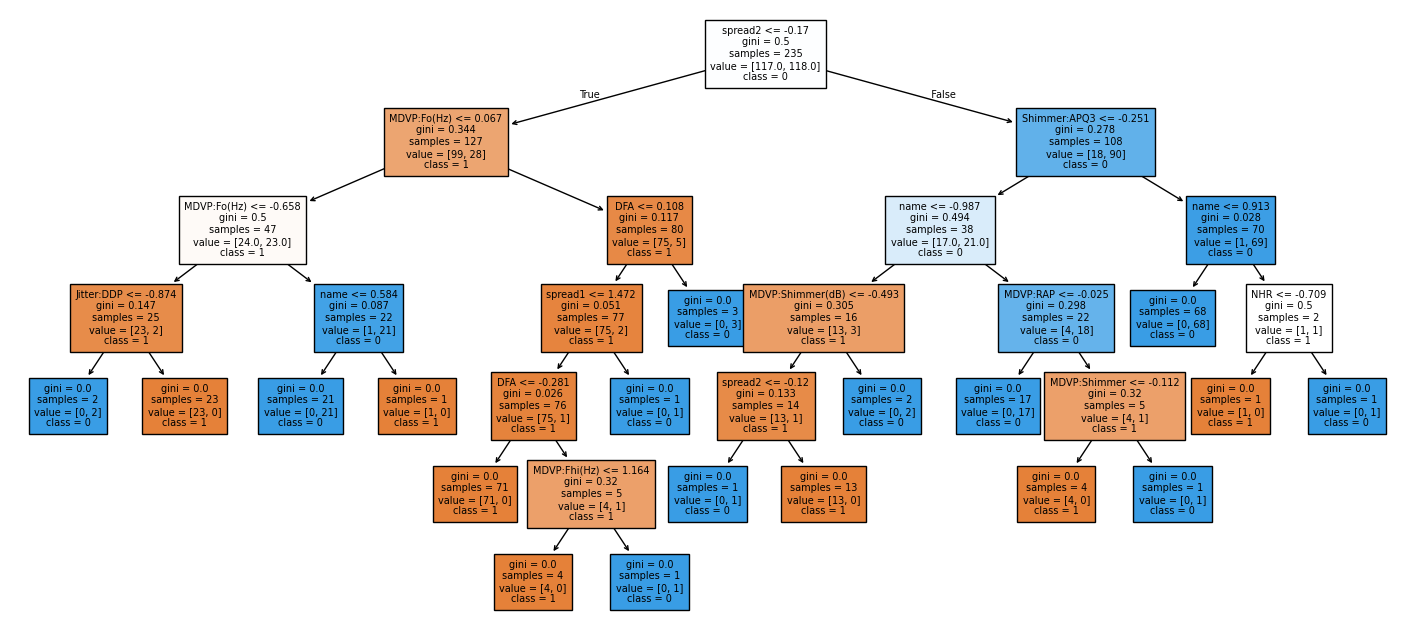

In [ ]:
class_names = [str(cls) for cls in df1["status"].unique()]

plt.figure(figsize=(18,8))
tree.plot_tree(clf, fontsize=7,  filled=True, feature_names=df.columns, class_names=class_names)
plt.show()
# klasyfikujemy w drzewie według pierwszego warunku (tego ktory jest w pierwszej linijce kazdego okienka)
# gini - parametr czystości węzłów, jest czysty gdy jest jak najbliższy 0 przyjmuje wartosci [0,1]
# jak true to idziemy w lewo w drzewie, jak false to w prawo
# drzewo nie zawsze wykorzystuje wszystkie parametry, wykorzystuje te ktore dadza najwieksza czystosc


Feature importances
MDVP:Fo(Hz)         0.087232
MDVP:Fhi(Hz)        0.244170
MDVP:Flo(Hz)        0.013617
MDVP:Jitter(%)      0.000000
MDVP:Jitter(Abs)    0.000000
MDVP:RAP            0.000000
MDVP:PPQ            0.042090
Jitter:DDP          0.000000
MDVP:Shimmer        0.031320
MDVP:Shimmer(dB)    0.013617
Shimmer:APQ3        0.025684
Shimmer:APQ5        0.078632
MDVP:APQ            0.000000
Shimmer:DDA         0.000000
NHR                 0.000000
HNR                 0.008511
RPDE                0.000000
DFA                 0.000000
spread1             0.000000
spread2             0.049810
D2                  0.016361
PPE                 0.388956
dtype: float64


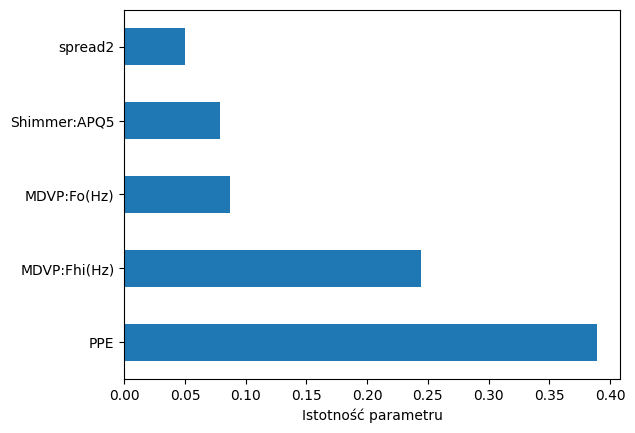

In [ ]:
# Badanie istotności cech
print('\nFeature importances')
importances = pd.Series(clf.feature_importances_, index=df1.columns[0:22])
print(importances)
importances.nlargest().plot(kind='barh')
plt.xlabel('Istotność parametru')
plt.show()

In [ ]:
accuracy_clf_train_resampled = accuracy_score(y_train_resampled, y_pred_clf_train_resampled)
cm_clf_train_resampled = confusion_matrix(y_train_resampled, y_pred_clf_train_resampled)
cr_clf_train_resampled = classification_report(y_train_resampled, y_pred_clf_train_resampled)

accuracy_clf_test_resampled = accuracy_score(y_test_resampled, y_pred_clf_test_resampled)
cm_clf_test_resampled = confusion_matrix(y_test_resampled, y_pred_clf_test_resampled)
cr_clf_test_resampled = classification_report(y_test_resampled, y_pred_clf_test_resampled)

print('Drzewa decyzyjne\n')


print(f'Dokładność zbioru treningowego: {accuracy_clf_train_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru treningowego:')
#print(cm_clf_train_resampled)
print('\nRaport klasyfikacyjny dla zbioru treningowego:')
print(cr_clf_train_resampled)

print(f'Dokładność zbioru testowego: {accuracy_clf_test_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru testowego:')
#print(cm_clf_test_resampled)
print('\nRaport klasyfikacyjny dla zbioru testowego:')
print(cr_clf_test_resampled)

Drzewa decyzyjne

Dokładność zbioru treningowego: 1.0000

Raport klasyfikacyjny dla zbioru treningowego:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       118

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235

Dokładność zbioru testowego: 0.9831

Raport klasyfikacyjny dla zbioru testowego:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.97      0.98        29

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



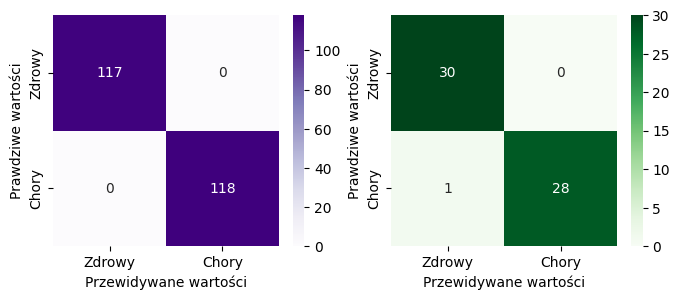

In [ ]:
plt.figure(figsize=(8, 3))
#plt.suptitle('Macierze pomyłek dla zbalansowanych danych')


plt.subplot(1,2,1)
sns.heatmap(cm_clf_train_resampled, annot=True, fmt='d', cmap='Purples', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru treningowego')

plt.subplot(1,2,2)
sns.heatmap(cm_clf_test_resampled, annot=True, fmt='d', cmap='Greens', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru testowego')

plt.show()

SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=2, gamma=1)

In [ ]:
svc.fit(X_train_resampled, y_train_resampled)
y_pred_svc_train_resampled = svc.predict(X_train_resampled)
y_pred_svc_test_resampled = svc.predict(X_test_resampled)

In [ ]:
accuracy_svc_train_resampled = accuracy_score(y_train_resampled, y_pred_svc_train_resampled)
cm_svc_train_resampled = confusion_matrix(y_train_resampled, y_pred_svc_train_resampled)
cr_svc_train_resampled = classification_report(y_train_resampled, y_pred_svc_train_resampled)

accuracy_svc_test_resampled = accuracy_score(y_test_resampled, y_pred_svc_test_resampled)
cm_svc_test_resampled = confusion_matrix(y_test_resampled, y_pred_svc_test_resampled)
cr_svc_test_resampled = classification_report(y_test_resampled, y_pred_svc_test_resampled)

print('SVC\n')


print(f'Dokładność zbioru treningowego: {accuracy_svc_train_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru treningowego:')
#print(cm_svc_train_resampled)
print('\nRaport klasyfikacyjny dla zbioru treningowego:')
print(cr_svc_train_resampled)

print(f'Dokładność zbioru testowego: {accuracy_svc_test_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru testowego:')
#print(cm_svc_test_resampled)
print('\nRaport klasyfikacyjny dla zbioru testowego:')
print(cr_svc_test_resampled)

SVC

Dokładność zbioru treningowego: 1.0000

Raport klasyfikacyjny dla zbioru treningowego:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       118

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235

Dokładność zbioru testowego: 1.0000

Raport klasyfikacyjny dla zbioru testowego:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



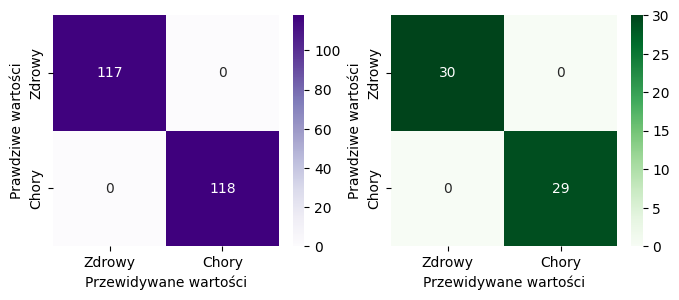

In [ ]:
plt.figure(figsize=(8,3))
#plt.suptitle('Macierze pomyłek dla zbalansowanych danych')


plt.subplot(1,2,1)
sns.heatmap(cm_svc_train_resampled, annot=True, fmt='d', cmap='Purples', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru treningowego')

plt.subplot(1,2,2)
sns.heatmap(cm_svc_test_resampled, annot=True, fmt='d', cmap='Greens', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru testowego')

plt.show()

Lasy losowe


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators - liczba drzew w lesie

In [ ]:
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf_train_resampled = rf.predict(X_train_resampled)
y_pred_rf_test_resampled = rf.predict(X_test_resampled)

In [ ]:
accuracy_rf_train_resampled = accuracy_score(y_train_resampled, y_pred_rf_train_resampled)
cm_rf_train_resampled = confusion_matrix(y_train_resampled, y_pred_rf_train_resampled)
cr_rf_train_resampled = classification_report(y_train_resampled, y_pred_rf_train_resampled)

accuracy_rf_test_resampled = accuracy_score(y_test_resampled, y_pred_rf_test_resampled)
cm_rf_test_resampled = confusion_matrix(y_test_resampled, y_pred_rf_test_resampled)
cr_rf_test_resampled = classification_report(y_test_resampled, y_pred_rf_test_resampled)


print('Lasy losowe\n')


print(f'Dokładność zbioru treningowego: {accuracy_rf_train_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru treningowego:')
#print(cm_rf_train_resampled)
print('\nRaport klasyfikacyjny dla zbioru treningowego:')
print(cr_rf_train_resampled)

print(f'Dokładność zbioru testowego: {accuracy_rf_test_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru testowego:')
#print(cm_rf_test_resampled)
print('\nRaport klasyfikacyjny dla zbioru testowego:')
print(cr_rf_test_resampled)

Lasy losowe

Dokładność zbioru treningowego: 1.0000

Raport klasyfikacyjny dla zbioru treningowego:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       118

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235

Dokładność zbioru testowego: 1.0000

Raport klasyfikacyjny dla zbioru testowego:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



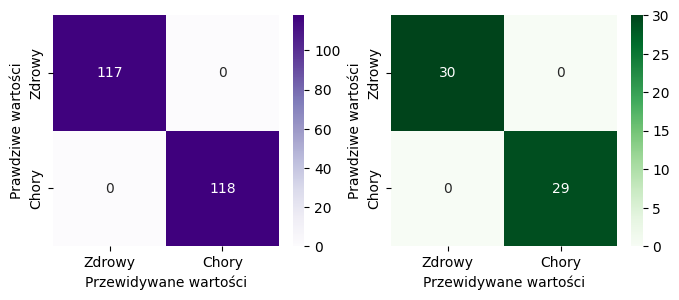

In [ ]:
plt.figure(figsize=(8, 3))
#plt.suptitle('Macierze pomyłek dla zbalansowanych danych')


plt.subplot(1,2,1)
sns.heatmap(cm_rf_train_resampled, annot=True, fmt='d', cmap='Purples', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru treningowego')

plt.subplot(1,2,2)
sns.heatmap(cm_rf_test_resampled, annot=True, fmt='d', cmap='Greens', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru testowego')

plt.show()

K - najbliższych sąsiadów


In [ ]:
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn_train_resampled = knn.predict(X_train_resampled)
y_pred_knn_test_resampled = knn.predict(X_test_resampled)

In [ ]:
accuracy_knn_train_resampled = accuracy_score(y_train_resampled, y_pred_knn_train_resampled)
cm_knn_train_resampled = confusion_matrix(y_train_resampled, y_pred_knn_train_resampled)
cr_knn_train_resampled = classification_report(y_train_resampled, y_pred_knn_train_resampled)

accuracy_knn_test_resampled = accuracy_score(y_test_resampled, y_pred_knn_test_resampled)
cm_knn_test_resampled = confusion_matrix(y_test_resampled, y_pred_knn_test_resampled)
cr_knn_test_resampled = classification_report(y_test_resampled, y_pred_knn_test_resampled)

print('K - najbliższych sąsiadów\n')


print(f'Dokładność zbioru treningowego: {accuracy_knn_train_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru treningowego:')
#print(cm_knn_train_resampled)
print('\nRaport klasyfikacyjny dla zbioru treningowego:')
print(cr_knn_train_resampled)

print(f'Dokładność zbioru testowego: {accuracy_knn_test_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru testowego:')
#print(cm_knn_test_resampled)
print('\nRaport klasyfikacyjny dla zbioru testowego:')
print(cr_knn_test_resampled)

K - najbliższych sąsiadów

Dokładność zbioru treningowego: 0.9787

Raport klasyfikacyjny dla zbioru treningowego:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       117
           1       1.00      0.96      0.98       118

    accuracy                           0.98       235
   macro avg       0.98      0.98      0.98       235
weighted avg       0.98      0.98      0.98       235

Dokładność zbioru testowego: 1.0000

Raport klasyfikacyjny dla zbioru testowego:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



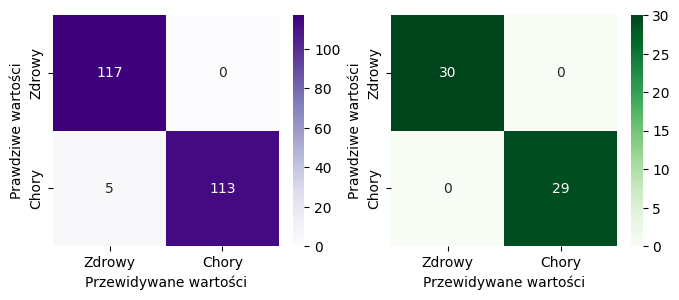

In [ ]:
plt.figure(figsize=(8, 3))
#plt.suptitle('Macierze pomyłek dla zbalansowanych danych')


plt.subplot(1,2,1)
sns.heatmap(cm_knn_train_resampled, annot=True, fmt='d', cmap='Purples', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru treningowego')

plt.subplot(1,2,2)
sns.heatmap(cm_knn_test_resampled, annot=True, fmt='d', cmap='Greens', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru testowego')

plt.show()

Gradient Boosting Machines (GBM)



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# Klasyfikator gradient boostin
# max_depth - maksymalna głębokość drzewa
# learning_rate - szybkość uczenia

In [ ]:
gbm.fit(X_train_resampled, y_train_resampled)
y_pred_gbm_train_resampled = gbm.predict(X_train_resampled)
y_pred_gbm_test_resampled = gbm.predict(X_test_resampled)

In [ ]:
accuracy_gbm_train_resampled = accuracy_score(y_train_resampled, y_pred_gbm_train_resampled)
cm_gbm_train_resampled = confusion_matrix(y_train_resampled, y_pred_gbm_train_resampled)
cr_gbm_train_resampled = classification_report(y_train_resampled, y_pred_gbm_train_resampled)

accuracy_gbm_test_resampled = accuracy_score(y_test_resampled, y_pred_gbm_test_resampled)
cm_gbm_test_resampled = confusion_matrix(y_test_resampled, y_pred_gbm_test_resampled)
cr_gbm_test_resampled = classification_report(y_test_resampled, y_pred_gbm_test_resampled)

print('Gradient Boosting Machine\n')


print(f'Dokładność zbioru treningowego: {accuracy_gbm_train_resampled:.4f}')
#rint('\nMacierz pomyłek dla zbioru treningowego:')
#print(cm_gbm_train_resampled)
print('\nRaport klasyfikacyjny dla zbioru treningowego:')
print(cr_gbm_train_resampled)

print(f'Dokładność zbioru testowego: {accuracy_gbm_test_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru testowego:')
#print(cm_gbm_test_resampled)
print('\nRaport klasyfikacyjny dla zbioru testowego:')
print(cr_gbm_test_resampled)

Gradient Boosting Machine

Dokładność zbioru treningowego: 1.0000

Raport klasyfikacyjny dla zbioru treningowego:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       118

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235

Dokładność zbioru testowego: 0.9661

Raport klasyfikacyjny dla zbioru testowego:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.94      1.00      0.97        29

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



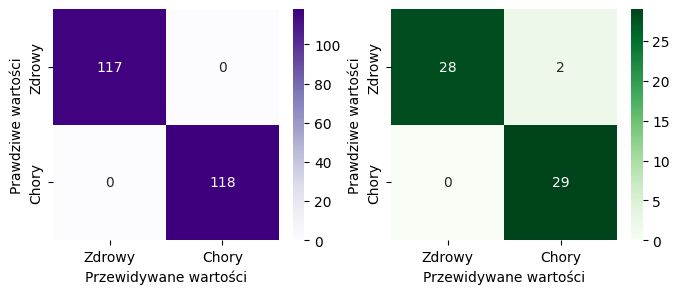

In [ ]:
plt.figure(figsize=(8, 3))
#plt.suptitle('Macierze pomyłek dla zbalansowanych danych')


plt.subplot(1,2,1)
sns.heatmap(cm_gbm_train_resampled, annot=True, fmt='d', cmap='Purples', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru treningowego')

plt.subplot(1,2,2)
sns.heatmap(cm_gbm_test_resampled, annot=True, fmt='d', cmap='Greens', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru testowego')

plt.show()

XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
xgbclf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=3, seed=42)
# objective - funkcja celu, tutaj klasyfikacja binarna
# seed - ziarno losowe dla powtarzalności wyników

In [ ]:
xgbclf.fit(X_train_resampled, y_train_resampled)
y_pred_xgbclf_train_resampled = gbm.predict(X_train_resampled)
y_pred_xgbclf_test_resampled = gbm.predict(X_test_resampled)

In [ ]:
accuracy_xgbclf_train_resampled = accuracy_score(y_train_resampled, y_pred_xgbclf_train_resampled)
cm_xgbclf_train_resampled = confusion_matrix(y_train_resampled, y_pred_xgbclf_train_resampled)
cr_xgbclf_train_resampled = classification_report(y_train_resampled, y_pred_xgbclf_train_resampled)

accuracy_xgbclf_test_resampled = accuracy_score(y_test_resampled, y_pred_xgbclf_test_resampled)
cm_xgbclf_test_resampled = confusion_matrix(y_test_resampled, y_pred_xgbclf_test_resampled)
cr_xgbclf_test_resampled = classification_report(y_test_resampled, y_pred_xgbclf_test_resampled)

print('XGBoosting\n')


print(f'Dokładność zbioru treningowego: {accuracy_xgbclf_train_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru treningowego:')
#print(cm_xgbclf_train_resampled)
print('\nRaport klasyfikacyjny dla zbioru treningowego:')
print(cr_xgbclf_train_resampled)

print(f'Dokładność zbioru testowego: {accuracy_xgbclf_test_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru testowego:')
#print(cm_xgbclf_test_resampled)
print('\nRaport klasyfikacyjny dla zbioru testowego:')
print(cr_xgbclf_test_resampled)

XGBoosting

Dokładność zbioru treningowego: 1.0000

Raport klasyfikacyjny dla zbioru treningowego:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       118

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235

Dokładność zbioru testowego: 0.9661

Raport klasyfikacyjny dla zbioru testowego:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.94      1.00      0.97        29

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



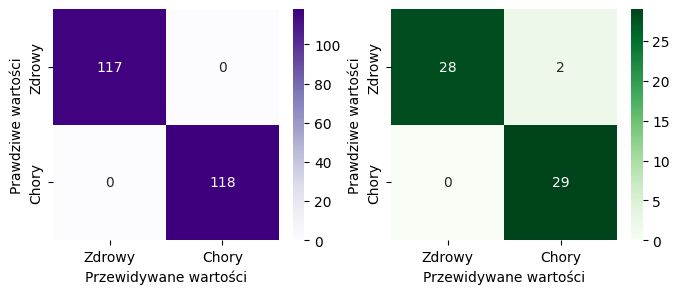

In [ ]:
plt.figure(figsize=(8, 3))
#plt.suptitle('Macierze pomyłek dla zbalansowanych danych')


plt.subplot(1,2,1)
sns.heatmap(cm_xgbclf_train_resampled, annot=True, fmt='d', cmap='Purples', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru treningowego')

plt.subplot(1,2,2)
sns.heatmap(cm_xgbclf_test_resampled, annot=True, fmt='d', cmap='Greens', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru testowego')

plt.show()

Light GBM



In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.05, num_leaves=31)
# num_leaves - maksymalna liczba liści w jednym drzewie

In [ ]:
lgbm.fit(X_train_resampled, y_train_resampled)
y_pred_lgbm_train_resampled = gbm.predict(X_train_resampled)
y_pred_lgbm_test_resampled = gbm.predict(X_test_resampled)

[LightGBM] [Info] Number of positive: 118, number of negative: 117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1688
[LightGBM] [Info] Number of data points in the train set: 235, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502128 -> initscore=0.008511
[LightGBM] [Info] Start training from score 0.008511
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
# SMOTE
accuracy_lgbm_train_resampled = accuracy_score(y_train_resampled, y_pred_lgbm_train_resampled)
cm_lgbm_train_resampled = confusion_matrix(y_train_resampled, y_pred_lgbm_train_resampled)
cr_lgbm_train_resampled = classification_report(y_train_resampled, y_pred_lgbm_train_resampled)

accuracy_lgbm_test_resampled = accuracy_score(y_test_resampled, y_pred_lgbm_test_resampled)
cm_lgbm_test_resampled = confusion_matrix(y_test_resampled, y_pred_lgbm_test_resampled)
cr_lgbm_test_resampled = classification_report(y_test_resampled, y_pred_lgbm_test_resampled)

print('Light GBM\n')


print(f'Dokładność zbioru treningowego: {accuracy_lgbm_train_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru treningowego:')
#print(cm_lgbm_train_resampled)
print('\nRaport klasyfikacyjny dla zbioru treningowego:')
print(cr_lgbm_train_resampled)

print(f'Dokładność zbioru testowego: {accuracy_lgbm_test_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru testowego:')
#print(cm_lgbm_test_resampled)
print('\nRaport klasyfikacyjny dla zbioru testowego:')
print(cr_lgbm_test_resampled)

Light GBM

Dokładność zbioru treningowego: 1.0000

Raport klasyfikacyjny dla zbioru treningowego:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       118

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235

Dokładność zbioru testowego: 0.9661

Raport klasyfikacyjny dla zbioru testowego:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.94      1.00      0.97        29

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



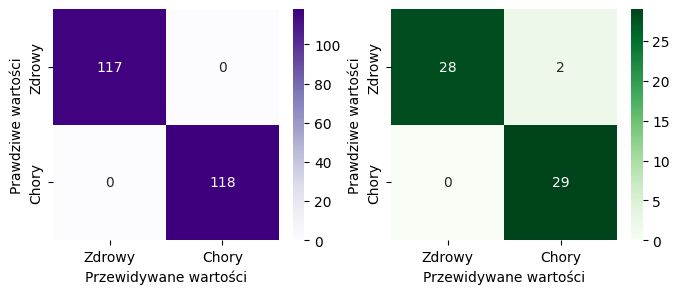

In [ ]:
plt.figure(figsize=(8, 3))
#plt.suptitle('Macierze pomyłek dla zbalansowanych danych')


plt.subplot(1,2,1)
sns.heatmap(cm_lgbm_train_resampled, annot=True, fmt='d', cmap='Purples', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru treningowego')

plt.subplot(1,2,2)
sns.heatmap(cm_lgbm_test_resampled, annot=True, fmt='d', cmap='Greens', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru testowego')

plt.show()

CatBoost



In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=False)

In [ ]:
cat.fit(X_train_resampled, y_train_resampled)
y_pred_cat_train_resampled = cat.predict(X_train_resampled)
y_pred_cat_test_resampled = cat.predict(X_test_resampled)

In [ ]:
accuracy_cat_train_resampled = accuracy_score(y_train_resampled, y_pred_cat_train_resampled)
cm_cat_train_resampled = confusion_matrix(y_train_resampled, y_pred_cat_train_resampled)
cr_cat_train_resampled = classification_report(y_train_resampled, y_pred_cat_train_resampled)

accuracy_cat_test_resampled = accuracy_score(y_test_resampled, y_pred_cat_test_resampled)
cm_cat_test_resampled = confusion_matrix(y_test_resampled, y_pred_cat_test_resampled)
cr_cat_test_resampled = classification_report(y_test_resampled, y_pred_cat_test_resampled)

print('Catboost\n')


print(f'Dokładność zbioru treningowego: {accuracy_cat_train_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru treningowego:')
#print(cm_cat_train_resampled)
print('\nRaport klasyfikacyjny dla zbioru treningowego:')
print(cr_cat_train_resampled)

print(f'Dokładność zbioru testowego: {accuracy_cat_test_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru testowego:')
#print(cm_cat_test_resampled)
print('\nRaport klasyfikacyjny dla zbioru testowego:')
print(cr_cat_test_resampled)

Catboost

Dokładność zbioru treningowego: 1.0000

Raport klasyfikacyjny dla zbioru treningowego:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       118

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235

Dokładność zbioru testowego: 1.0000

Raport klasyfikacyjny dla zbioru testowego:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



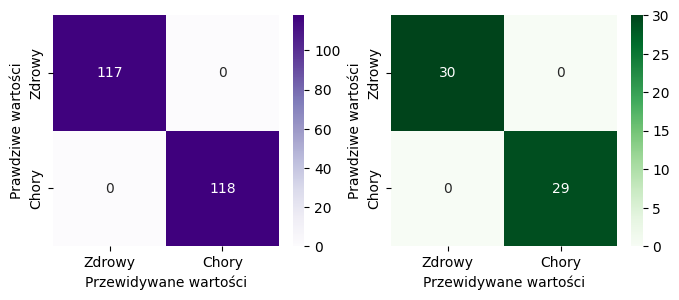

In [ ]:
plt.figure(figsize=(8, 3))
#plt.suptitle('Macierze pomyłek dla zbalansowanych danych')


plt.subplot(1,2,1)
sns.heatmap(cm_cat_train_resampled, annot=True, fmt='d', cmap='Purples', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru treningowego')

plt.subplot(1,2,2)
sns.heatmap(cm_cat_test_resampled, annot=True, fmt='d', cmap='Greens', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru testowego')

plt.show()

Naive Bayes



In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(X_train_resampled, y_train_resampled)
y_pred_nb_train_resampled = nb.predict(X_train_resampled)
y_pred_nb_test_resampled = nb.predict(X_test_resampled)

In [ ]:
accuracy_nb_train_resampled = accuracy_score(y_train_resampled, y_pred_nb_train_resampled)
cm_nb_train_resampled = confusion_matrix(y_train_resampled, y_pred_nb_train_resampled)
cr_nb_train_resampled = classification_report(y_train_resampled, y_pred_nb_train_resampled)

accuracy_nb_test_resampled = accuracy_score(y_test_resampled, y_pred_nb_test_resampled)
cm_nb_test_resampled = confusion_matrix(y_test_resampled, y_pred_nb_test_resampled)
cr_nb_test_resampled = classification_report(y_test_resampled, y_pred_nb_test_resampled)

print('Naive Bayes\n')


print(f'Dokładność zbioru treningowego: {accuracy_nb_train_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru treningowego:')
#print(cm_nb_train_resampled)
print('\nRaport klasyfikacyjny dla zbioru treningowego:')
print(cr_nb_train_resampled)

print(f'Dokładność zbioru testowego: {accuracy_nb_test_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru testowego:')
#print(cm_nb_test_resampled)
print('\nRaport klasyfikacyjny dla zbioru testowego:')
print(cr_nb_test_resampled)

Naive Bayes

Dokładność zbioru treningowego: 0.7617

Raport klasyfikacyjny dla zbioru treningowego:
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       117
           1       0.89      0.60      0.72       118

    accuracy                           0.76       235
   macro avg       0.79      0.76      0.76       235
weighted avg       0.79      0.76      0.76       235

Dokładność zbioru testowego: 0.8644

Raport klasyfikacyjny dla zbioru testowego:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       1.00      0.72      0.84        29

    accuracy                           0.86        59
   macro avg       0.89      0.86      0.86        59
weighted avg       0.89      0.86      0.86        59



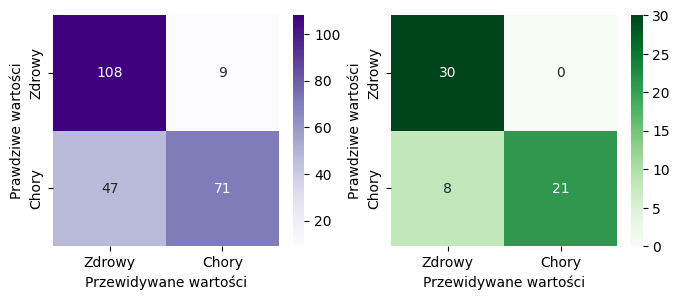

In [ ]:
plt.figure(figsize=(8, 3))
#plt.suptitle('Macierze pomyłek dla zbalansowanych danych')


plt.subplot(1,2,1)
sns.heatmap(cm_nb_train_resampled, annot=True, fmt='d', cmap='Purples', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru treningowego')

plt.subplot(1,2,2)
sns.heatmap(cm_nb_test_resampled, annot=True, fmt='d', cmap='Greens', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru testowego')

plt.show()

AdaBoost



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
ada.fit(X_train_resampled, y_train_resampled)
y_pred_ada_train_resampled = ada.predict(X_train_resampled)
y_pred_ada_test_resampled = ada.predict(X_test_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
accuracy_ada_train_resampled = accuracy_score(y_train_resampled, y_pred_ada_train_resampled)
cm_ada_train_resampled = confusion_matrix(y_train_resampled, y_pred_ada_train_resampled)
cr_ada_train_resampled = classification_report(y_train_resampled, y_pred_ada_train_resampled)

accuracy_ada_test_resampled = accuracy_score(y_test_resampled, y_pred_ada_test_resampled)
cm_ada_test_resampled = confusion_matrix(y_test_resampled, y_pred_ada_test_resampled)
cr_ada_test_resampled = classification_report(y_test_resampled, y_pred_ada_test_resampled)

print('AdaBoost\n')

print(f'Dokładność zbioru treningowego: {accuracy_ada_train_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru treningowego:')
#print(cm_ada_train_resampled)
print('\nRaport klasyfikacyjny dla zbioru treningowego:')
print(cr_ada_train_resampled)

print(f'Dokładność zbioru testowego: {accuracy_ada_test_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru testowego:')
#print(cm_ada_test_resampled)
print('\nRaport klasyfikacyjny dla zbioru testowego:')
print(cr_ada_test_resampled)

AdaBoost

Dokładność zbioru treningowego: 1.0000

Raport klasyfikacyjny dla zbioru treningowego:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       118

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235

Dokładność zbioru testowego: 0.9831

Raport klasyfikacyjny dla zbioru testowego:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.97      0.98        29

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



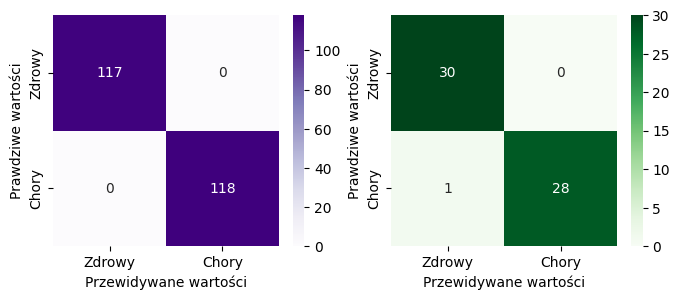

In [ ]:
plt.figure(figsize=(8,3))
#plt.suptitle('Macierze pomyłek dla zbalansowanych danych')


plt.subplot(1,2,1)
sns.heatmap(cm_ada_train_resampled, annot=True, fmt='d', cmap='Purples', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru treningowego')

plt.subplot(1,2,2)
sns.heatmap(cm_ada_test_resampled, annot=True, fmt='d', cmap='Greens', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru testowego')

plt.show()

Extra Trees


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=100, random_state=42)

In [ ]:
et.fit(X_train_resampled, y_train_resampled)
y_pred_et_train_resampled = et.predict(X_train_resampled)
y_pred_et_test_resampled = et.predict(X_test_resampled)

In [ ]:
accuracy_et_train_resampled = accuracy_score(y_train_resampled, y_pred_et_train_resampled)
cm_et_train_resampled = confusion_matrix(y_train_resampled, y_pred_et_train_resampled)
cr_et_train_resampled = classification_report(y_train_resampled, y_pred_et_train_resampled)

accuracy_et_test_resampled = accuracy_score(y_test_resampled, y_pred_et_test_resampled)
cm_et_test_resampled = confusion_matrix(y_test_resampled, y_pred_et_test_resampled)
cr_et_test_resampled = classification_report(y_test_resampled, y_pred_et_test_resampled)


print('Extra Trees\n')

print(f'Dokładność zbioru treningowego: {accuracy_et_train_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru treningowego:')
#print(cm_et_train_resampled)
print('\nRaport klasyfikacyjny dla zbioru treningowego:')
print(cr_et_train_resampled)

print(f'Dokładność zbioru testowego: {accuracy_et_test_resampled:.4f}')
#print('\nMacierz pomyłek dla zbioru testowego:')
#print(cm_et_test_resampled)
print('\nRaport klasyfikacyjny dla zbioru testowego:')
print(cr_et_test_resampled)

Extra Trees

Dokładność zbioru treningowego: 1.0000

Raport klasyfikacyjny dla zbioru treningowego:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       118

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235

Dokładność zbioru testowego: 1.0000

Raport klasyfikacyjny dla zbioru testowego:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



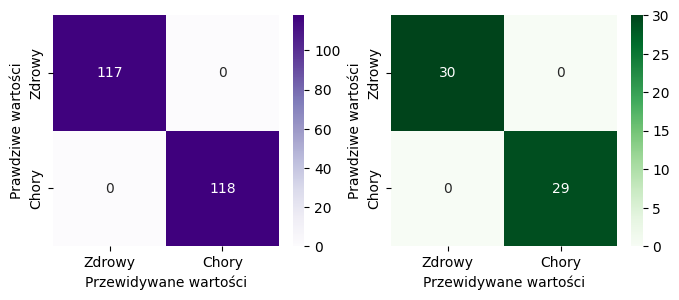

In [ ]:
plt.figure(figsize=(8, 3))
#plt.suptitle('Macierze pomyłek dla zbalansowanych danych')


plt.subplot(1,2,1)
sns.heatmap(cm_et_train_resampled, annot=True, fmt='d', cmap='Purples', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru treningowego')

plt.subplot(1,2,2)
sns.heatmap(cm_et_test_resampled, annot=True, fmt='d', cmap='Greens', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane wartości')
plt.ylabel('Prawdziwe wartości')
#plt.title('Macierz pomyłek dla zbioru testowego')

plt.show()

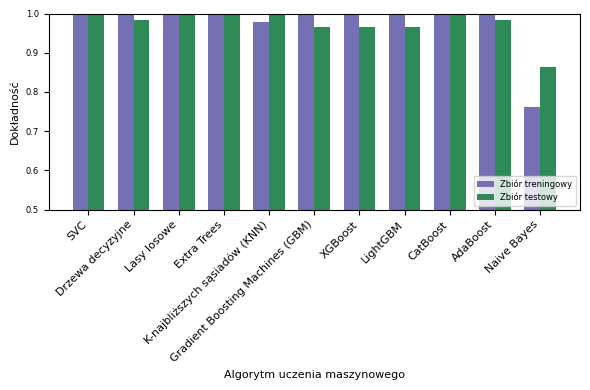

In [ ]:
# Porównanie dokładności modeli
algorithms = ['SVC','Drzewa decyzyjne','Lasy losowe','Extra Trees', 'K-najbliższych sąsiadów (KNN)',
              'Gradient Boosting Machines (GBM)', 'XGBoost', 'LightGBM', 'CatBoost',
               'AdaBoost', 'Naive Bayes']
accuracy_scores = [accuracy_svc_train_resampled,accuracy_svc_test_resampled,
                   accuracy_clf_train_resampled,accuracy_clf_test_resampled,
                   accuracy_rf_train_resampled,accuracy_rf_test_resampled,
                   accuracy_et_train_resampled, accuracy_et_test_resampled,
                   accuracy_knn_train_resampled, accuracy_knn_test_resampled,
                   accuracy_gbm_train_resampled, accuracy_gbm_test_resampled,
                   accuracy_xgbclf_train_resampled, accuracy_xgbclf_test_resampled,
                   accuracy_lgbm_train_resampled, accuracy_lgbm_test_resampled,
                   accuracy_cat_train_resampled, accuracy_cat_test_resampled,
                   accuracy_ada_train_resampled, accuracy_ada_test_resampled,
                   accuracy_nb_train_resampled, accuracy_nb_test_resampled]

train_scores = accuracy_scores[::2]
test_scores = accuracy_scores[1::2]

x = range(len(algorithms))

plt.figure(figsize=(6, 4))
bar_width = 0.35

plt.bar(x, train_scores, width=bar_width, label='Zbiór treningowy', color='#7570b3')

plt.bar([p + bar_width for p in x], test_scores, width=bar_width, label='Zbiór testowy', color='seagreen')

plt.xlabel('Algorytm uczenia maszynowego', fontsize=8)
plt.ylabel('Dokładność', fontsize=8)
#plt.title('Porównanie dokładności algorytmów')
plt.ylim(0.5, 1)
plt.xticks([p + bar_width / 2 for p in x], algorithms, rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=6)
plt.legend(loc='lower right',fontsize=6)
plt.tight_layout()

plt.show()